# Crash Course in Neural Networks with Keras
This is a brief introduction to using Keras, which will also teach you a bit about neural networks along the way.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras, glob
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## 0. Neural Network = Model
In broad terms machine learning is teaching a machine the relation between some input, $x$ and some output $y$, so 

$y = f(x, a) $

where $a$ is a set of parameters that define the function $f$.

A neural network can therefore be thought of as a model $f$ that has a set of parameters, $a$, that you try to optimize to best predict the relation between, a set of training images and their labels. 

Neural networks can also be used for regression problems, and very simplified analogy would be a very complicated, high-order polynomial. 

### Sequential models
Most neural networks, or models, you can construct with Keras fall under the sequential model type. This is the 'typical' network seen in most illustrations, and consists of a sequence of layers that each take inputs from neurons in the preceding layer, perform some operation depending on the layer type, and then feed it forward into the next layer in the sequence.

In 'classical' code, this would look something like:
```python
y = input(x)
y = layer1_func(y)
y = layer2_func(y)
y = output(y)
```

Keras gives access to many types of layers, corresponding to different arithmetic functions and array manipulations. Keras allows you to mix and match these layers in your sequence, and will automatically sort out the connections between them. 

In [2]:
# Initialising a sequential model
model = Sequential()

## 1. Classification
This sets up a simple image classifier, to classify images of cats and dogs.

### Setting up data
#### Training data
To set up a training set, all you need to do it create a directory, where sub-directories correspond to each class. 

Example:

/home/training_set/cats

/home/training_set/dogs

Keras then only needs to be pointed at /home/training_set and it will figure out the classes, in this case cats and dogs.

#### Validation data
The training data that the network never sees.

#### Testing data
The data neither you or the network have seen. Performance on this is what you put in the paper.

In [3]:
# Directory where you have placed your training data
training_dir = '/home/nielsemb/work/Teaching/Kerastutorial/training_set' # EDIT THIS
validation_dir = '/home/nielsemb/work/Teaching/Kerastutorial/validation_set' # EDIT THIS
testing_dir = '/home/nielsemb/work/Teaching/Kerastutorial/test_set' # EDIT THIS

### Data Generators
Data generators are functions used for ingesting data and feeding it into your network, with some degree of manupulations along the way. They are typically used to feed in small batches of the training data, so as to conserve memory in case the training set is very large.

For image classification Keras has a built in class ImageDataGenerator that does this, and also preprocesses the images, and can perform data augmentation. 

#### Preprocessing
Image data comes in a variety of different shapes, sizes and formats. Your network will only function or at least function well, on images that are preprocessed in a similar fashion to what it's been trained on. It's therefore useful to establish a format specific for your network. These include, rescaling the pixel values to be between 0 and 255 (png standard), binning or interpolating the image to a specific shape. 

#### Data Augmentation
In general purpose classification it is sometimes useful to alter the training data in some way. This makes the network able to handle a greater variation in the unseen data. It can also be used to artificially increase the number of training examples.

In [4]:
# Image preprocessing
image_dim = (64, 64) # Image dimensions, important for network arch.
rescale = 1./255 # Rescale pixel values to minimum 0, maximum 255

# Data Augmentation
shear_range = 0.2 # Randomly shearing the image alonge either axis
zoom_range = 0.2 # Randomly zoom in on parts of the image 
horizontal_flip = True # Randomly flip images horizontaly

# Training-time parameters
batchsize = 32 # no. of images generator yields each call
shuffle = True # randomize the training set
class_mode = 'categorical' # specific to network type, classifiers can be 'binary' or 'categorical'

# Initialize the ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale = rescale, 
                                   shear_range = shear_range, 
                                   zoom_range = zoom_range,
                                   horizontal_flip = horizontal_flip) 

# Setup the ImageDataGenerator instance to ingest images from training_dir
training_set = train_datagen.flow_from_directory(training_dir,
                                                 target_size = image_dim, 
                                                 batch_size = batchsize, 
                                                 shuffle = shuffle,
                                                 class_mode = class_mode)


# Initialize the ImageDataGenerator class
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the ImageDataGenerator instance to ingest images from training_dir
validation_set = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size = image_dim,
                                                        batch_size = batchsize,
                                                        class_mode = class_mode)

Found 2470 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Building the network

In [5]:
conv_kernel = (3,3)
model.add(Conv2D(32, conv_kernel, input_shape = (image_dim[0], image_dim[1], 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.1))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the network

In [7]:
history = model.fit_generator(training_set, 
                    steps_per_epoch = int(training_set.samples/batchsize), 
                    epochs = 25, 
                    validation_data = validation_set,
                    validation_steps = int(validation_set.samples/batchsize))

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
77/77 [==============================] - 9s 113ms/step - loss: 0.6687 - acc: 0.6002 - val_loss: 0.6818 - val_acc: 0.5288
Epoch 2/25
77/77 [==============================] - 8s 99ms/step - loss: 0.6122 - acc: 0.6433 - val_loss: 0.6425 - val_acc: 0.6500
Epoch 3/25
77/77 [==============================] - 8s 100ms/step - loss: 0.5902 - acc: 0.6771 - val_loss: 0.6585 - val_acc: 0.6375
Epoch 4/25
77/77 [==============================] - 8s 99ms/step - loss: 0.5641 - acc: 0.7052 - val_loss: 0.6495 - val_acc: 0.6575
Epoch 5/25
77/77 [==============================] - 8s 99ms/step - loss: 0.5538 - acc: 0.7125 - val_loss: 0.6391 - val_acc: 0.6713
Epoch 6/25
77/77 [==============================] - 8s 99ms/step - loss: 0.5442 - acc: 0.7205 - val_loss: 0.5893 - val_acc: 0.6925
Epoch 7/25
77/77 [==============================] - 8s 98ms/step - loss: 0.5278 - acc: 0.7392 - val_loss: 0.6679 - val_acc: 0.6625
Epoch 8/25
77/77 [===============

### Testing the network

Found 200 images belonging to 2 classes.
[[0.7315768 0.2684232]]
[[0.4284355  0.57156444]]
[[0.06305486 0.9369452 ]]
[[0.07134313 0.92865694]]
[[0.5799974  0.42000258]]
[[0.3988542  0.60114574]]
[[0.99451643 0.00548352]]
[[0.1848252 0.8151748]]
[[0.9185359  0.08146407]]
[[0.68580866 0.31419134]]
[[0.48929718 0.51070285]]
[[0.00980506 0.990195  ]]
[[0.42972913 0.57027084]]
[[0.5492531  0.45074683]]
[[0.5421891  0.45781085]]
[[0.18964703 0.810353  ]]
[[0.6060256 0.3939744]]
[[0.65724766 0.34275237]]
[[0.00784671 0.9921532 ]]
[[0.12594926 0.8740507 ]]
[[0.7593341  0.24066597]]
[[0.02213231 0.9778677 ]]
[[0.7805145  0.21948552]]
[[0.24604282 0.7539572 ]]
[[0.7315768  0.2684232 ]
 [0.4284355  0.57156444]
 [0.06305486 0.9369452 ]
 [0.07134313 0.92865694]
 [0.57999742 0.42000258]
 [0.3988542  0.60114574]
 [0.99451643 0.00548352]
 [0.1848252  0.81517482]
 [0.91853589 0.08146407]
 [0.68580866 0.31419134]
 [0.48929718 0.51070285]
 [0.00980506 0.99019498]
 [0.42972913 0.57027084]
 [0.54925311 0.4

/home/nielsemb/anaconda3/envs/kerasenv/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


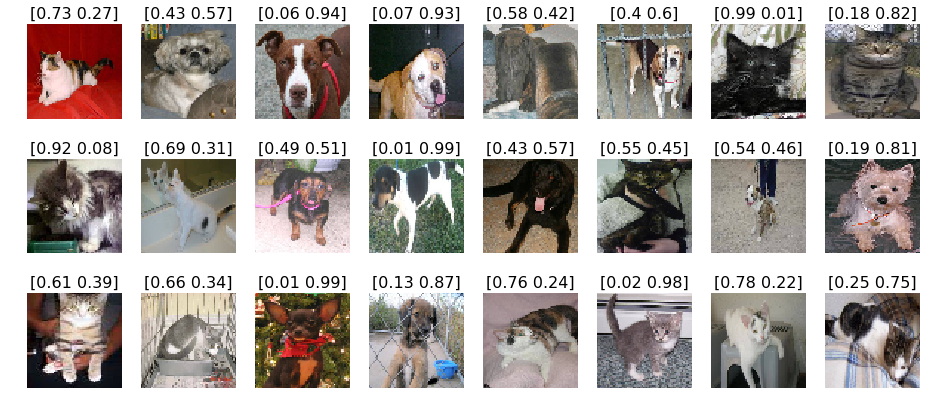

In [8]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(16,7), rows=3, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(np.around(titles[i],2), fontsize=16)
        plt.imshow(ims[i])


# Initialize the ImageDataGenerator class
testing_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the ImageDataGenerator instance to ingest images from training_dir
testing_set = testing_datagen.flow_from_directory(testing_dir,
                                                  target_size = image_dim,
                                                  batch_size = 1)
N = 24    
predicted_labels = np.zeros((N,2))
test_images = []
for i in range(N):
    test_image, true_labels = next(testing_set)
    test_images.append(test_image[0])
    print(model.predict(test_image))
    predicted_labels[i,:] = model.predict(test_image)#[0]    
print(predicted_labels)
plots(test_images, titles=predicted_labels)

## 2. Hyperparameters and Callbacks

### Activation functions

Activation functions are used to convert from an input signal of a node to an output signal. That output can then be used as an input to the next layer or as the output layer. They introduce non-linearity into our network which we need in order to make a flexible map from input to output.

In [9]:
# Just for plots below
x = np.linspace(-5,5,100)

def plot_activation(x,A):    
    ax = plt.gca()
    ax.plot(x, A)
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

There are activation function in keras (or through a TensorFlow/Theano function). These can be added as a separate layer when you build your model, e.g.:
```python
model.add(Dense(64))
model.add(Activation('tanh'))
```

or as an argument within each layer, e.g.:
```python
model.add(Dense(64, activation='tanh'))
```

The options are:

- __LINEAR__:

```python
activation = 'linear'
```

\begin{equation*}
A(x) = x
\end{equation*}

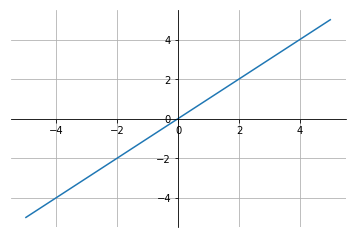

In [10]:
A = x
plot_activation(x,A)

- __RELU__:
```python
activation = 'relu'
```

\begin{equation*}
A(x) = \begin{cases}
x & \text{if x>0,}\\
0 & \text{otherwise.}
\end{cases}
\end{equation*}

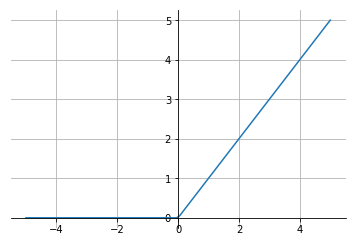

In [11]:
A = np.where(x<0, 0, x)
plot_activation(x,A)

- __ELU__:

```python
activation = 'elu'
```

\begin{equation*}
A(x) = \begin{cases}
x & \text{if x>0,}\\
\alpha . (e^{x}-1) & \text{otherwise.}
\end{cases}
\end{equation*}

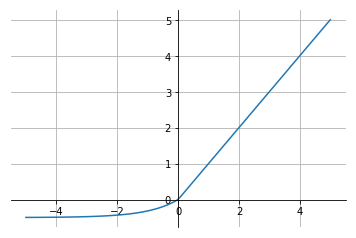

In [12]:
alpha = 0.5
A = np.where(x<0, alpha * (np.exp(x)-1), x)
plot_activation(x,A)

- __TANH__:

```python
activation = 'tanh'
```

\begin{equation*}
A(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\end{equation*}

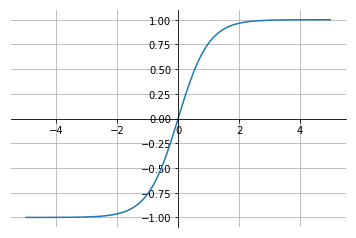

In [13]:
A = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plot_activation(x,A)

- __SIGMOID__:

```python
activation = 'sigmoid'
```

\begin{equation*}
A(x) = \frac{1}{1 + e^{-x}}
\end{equation*}

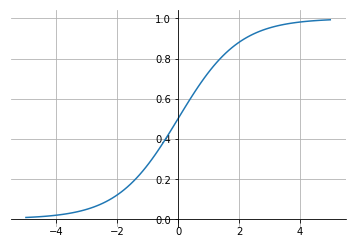

In [14]:
A = (1) / (1 + np.exp(-x))
plot_activation(x,A)

- __SOFTMAX__:

```python
activation = 'softmax'
```

\begin{equation*}
A(x) = \frac{e^{x}}{\sum\limits^k_{j=0} e^{x_j}}
\end{equation*}

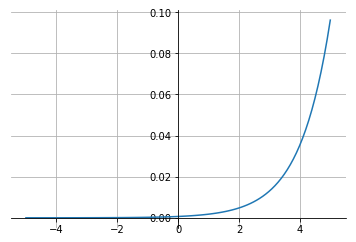

In [15]:
A = (np.exp(x)) / (np.sum(np.exp(x)))
plot_activation(x,A)

### Optimizers
These are used to update the weight parameters in order to minimise the loss function. This is an argument which is required for compiling your model in keras, i.e.:
```python
from keras import optimizers
optimizer = #you choose
loss = #you choose
model.compile(loss=loss, optimizer=optimizer)
```

This is done after you have built the layers of your model.

Some of the Keras options are:
- __Stochastic gradient descent__ (SGD)
    ```
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    ```
- __RMSProp__
    ```
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    ```
- __Adam__ (popular choice, RMSProp + Momentum)
    ```
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    ```
- __Adagrad__ (learning rate per parameter)
    ```
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    ```
- __Adadelta__ (adaptive learning rate per parameter)
    ```
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    ```

Some optimizer arguments:
- __learning rate__, ```lr=```, 
Parameter which controls how much the weights change with each update.
- __momentum__, 
Parameter that accelerates SGD in the relevant direction and dampens oscillations.
- __decay__,
Makes the learning rate decay after each update.
- __beta_1 & beta_2__, 
Parameters controling the adaptive decay rates per parameter. Keep close to 1.0.
- __epsilon__,
A small number to prevent any division by zero.

In [19]:
print(history.history.keys())

plt.plot(history.history['binary_crossentropy'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


KeyError: 'binary_crossentropy'

### Loss functions
The quantity to minimise to best fit the model. This is also required to compile your model (see above).

Some of the Keras options are:
- __mean squared error__
```
keras.losses.mean_squared_error(y_true, y_pred)
```
- __mean absolute error__
```
keras.losses.mean_absolute_error(y_true, y_pred)
```
- __binary cross entropy__
```
keras.losses.binary_crossentropy(y_true, y_pred)
```

They all take two arguments: ```y_true```: true labels, and ```y_pred```: the predictions of the model. Any custom loss function must use the same arguments. 

### Other hyperparameters
These are some example of arguments when fitting the model using ```model.fit()``` or ```model.fit_generator()```.
- __Number of epochs__, A hyperparameter to balance between training for long enough but not taking ages!
- __Callbacks__
- __Batch size__

### Callbacks
A callback is a function which is applied during training. You can use callbacks to get a view on internal states and statistics of the model during training or to change some hyperparameter. 

Some of the Keras options are:
- __BaseLogger__, accumulates epoch averages of metrics.
```
keras.callbacks.BaseLogger(stateful_metrics=None)
```
- __ModelCheckpoint__, saves the model after every epoch.
```
keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss')
```
- __EarlyStopping__, stops training when a monitored quantity has stopped improving.
```
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0)
```
- __ReduceLROnPlateau__, reduces learning rate when a metric has stopped improving.
```
keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
```
- __LambdaCallback__, for customising simple callbacks on-the-fly.
```
keras.callbacks.LambdaCallback(on_epoch_begin=None, on_epoch_end=None, 
                                 on_batch_begin=None, on_batch_end=None, 
                                 on_train_begin=None, on_train_end=None)
```

Or you can make a custom callback (see Keras documentation).